In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd
import pathlib
os.chdir('C:/Users/Charlie/Documents/eggtech')
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential




In [2]:
FILE_PATH = 'data/measurements/rounds-combined.csv'
FOLDER_PATH = 'data/images/split/combined_length'
data_dir = pathlib.Path(FOLDER_PATH)
batch_size = 16
img_height = 1200
img_width = 1600
class_names = ['female', 'male']
print('hi')
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

hi
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11377371528467794116
]


In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 631 files belonging to 2 classes.
Using 505 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 631 files belonging to 2 classes.
Using 126 files for validation.


In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [6]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2)
])


In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [8]:
epochs=25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/25


 1/32 [..............................] - ETA: 29:28 - loss: 0.7336 - accuracy: 0.3125

 2/32 [>.............................] - ETA: 7:07 - loss: 55.5418 - accuracy: 0.3750

 3/32 [=>............................] - ETA: 6:58 - loss: 64.6277 - accuracy: 0.4375

 4/32 [==>...........................] - ETA: 6:27 - loss: 65.8175 - accuracy: 0.4570

 5/32 [===>..........................] - ETA: 6:06 - loss: 63.8901 - accuracy: 0.4556

 6/32 [====>.........................] - ETA: 5:48 - loss: 61.8051 - accuracy: 0.4595

 7/32 [=====>........................] - ETA: 5:29 - loss: 59.5678 - accuracy: 0.4679

 8/32 [======>.......................] - ETA: 5:11 - loss: 57.5503 - accuracy: 0.4738

 9/32 [=======>......................] - ETA: 4:55 - loss: 55.5256 - accuracy: 0.4814

10/32 [========>.....................] - ETA: 4:45 - loss: 53.5438 - accuracy: 0.4895

11/32 [=========>....................] - ETA: 4:20 - loss: 51.7552 - accuracy: 0.4945

12/32 [==========>...................] - ETA: 4:06 - loss: 50.0641 - accuracy: 0.4965

13/32 [===========>..................] - ETA: 3:57 - loss: 48.4654 - accuracy: 0.4970

14/32 [============>.................] - ETA: 3:43 - loss: 46.9477 - accuracy: 0.4974

15/32 [=============>................] - ETA: 3:30 - loss: 45.5110 - accuracy: 0.4977

16/32 [==============>...............] - ETA: 3:18 - loss: 44.1547 - accuracy: 0.4990

17/32 [==============>...............] - ETA: 3:06 - loss: 42.8757 - accuracy: 0.5002

18/32 [===============>..............] - ETA: 2:53 - loss: 41.6700 - accuracy: 0.5019

19/32 [================>.............] - ETA: 2:40 - loss: 40.5331 - accuracy: 0.5037

20/32 [=================>............] - ETA: 2:27 - loss: 39.4606 - accuracy: 0.5053

21/32 [==================>...........] - ETA: 2:15 - loss: 38.4478 - accuracy: 0.5070

22/32 [===================>..........] - ETA: 2:02 - loss: 37.4902 - accuracy: 0.5086

23/32 [====================>.........] - ETA: 1:50 - loss: 36.5835 - accuracy: 0.5105

24/32 [=====================>........] - ETA: 1:39 - loss: 35.7242 - accuracy: 0.5121

25/32 [======================>.......] - ETA: 1:26 - loss: 34.9087 - accuracy: 0.5137

26/32 [=======================>......] - ETA: 1:14 - loss: 34.1340 - accuracy: 0.5153

27/32 [========================>.....] - ETA: 1:01 - loss: 33.3970 - accuracy: 0.5164

28/32 [=========================>....] - ETA: 49s - loss: 32.6951 - accuracy: 0.5176 

29/32 [==========================>...] - ETA: 37s - loss: 32.0258 - accuracy: 0.5187

30/32 [===========================>..] - ETA: 24s - loss: 31.3870 - accuracy: 0.5198

31/32 [============================>.] - ETA: 12s - loss: 30.7765 - accuracy: 0.5207

32/32 [==============================] - ETA: 0s - loss: 30.1925 - accuracy: 0.5214 

32/32 [==============================] - 468s 13s/step - loss: 29.6440 - accuracy: 0.5221 - val_loss: 0.6723 - val_accuracy: 0.6508


Epoch 2/25


 1/32 [..............................] - ETA: 8:51 - loss: 0.6500 - accuracy: 0.8125

 2/32 [>.............................] - ETA: 6:08 - loss: 0.6527 - accuracy: 0.7656

 3/32 [=>............................] - ETA: 5:55 - loss: 0.6566 - accuracy: 0.7326

 4/32 [==>...........................] - ETA: 5:40 - loss: 0.6577 - accuracy: 0.7135

 5/32 [===>..........................] - ETA: 5:29 - loss: 0.6590 - accuracy: 0.6958

 6/32 [====>.........................] - ETA: 5:17 - loss: 0.6584 - accuracy: 0.6875

 7/32 [=====>........................] - ETA: 5:04 - loss: 0.6568 - accuracy: 0.6824

 8/32 [======>.......................] - ETA: 4:49 - loss: 0.6548 - accuracy: 0.6801

 9/32 [=======>......................] - ETA: 4:23 - loss: 0.6551 - accuracy: 0.6751

10/32 [========>.....................] - ETA: 4:21 - loss: 0.6549 - accuracy: 0.6716

11/32 [=========>....................] - ETA: 4:09 - loss: 0.6548 - accuracy: 0.6687

12/32 [==========>...................] - ETA: 3:56 - loss: 0.6551 - accuracy: 0.6652

13/32 [===========>..................] - ETA: 3:44 - loss: 0.6551 - accuracy: 0.6626

14/32 [============>.................] - ETA: 3:33 - loss: 0.6547 - accuracy: 0.6611

15/32 [=============>................] - ETA: 3:22 - loss: 0.6539 - accuracy: 0.6605

16/32 [==============>...............] - ETA: 3:10 - loss: 0.6530 - accuracy: 0.6604

17/32 [==============>...............] - ETA: 2:57 - loss: 0.6525 - accuracy: 0.6601

18/32 [===============>..............] - ETA: 2:45 - loss: 0.6523 - accuracy: 0.6597

19/32 [================>.............] - ETA: 2:34 - loss: 0.6522 - accuracy: 0.6595

20/32 [=================>............] - ETA: 2:22 - loss: 0.6520 - accuracy: 0.6594

21/32 [==================>...........] - ETA: 2:10 - loss: 0.6529 - accuracy: 0.6587

22/32 [===================>..........] - ETA: 1:58 - loss: 0.6544 - accuracy: 0.6574

23/32 [====================>.........] - ETA: 1:46 - loss: 0.6558 - accuracy: 0.6558

24/32 [=====================>........] - ETA: 1:35 - loss: 0.6571 - accuracy: 0.6542

25/32 [======================>.......] - ETA: 1:23 - loss: 0.6582 - accuracy: 0.6527

26/32 [=======================>......] - ETA: 1:12 - loss: 0.6592 - accuracy: 0.6512

27/32 [========================>.....] - ETA: 1:00 - loss: 0.6601 - accuracy: 0.6500

28/32 [=========================>....] - ETA: 48s - loss: 0.6609 - accuracy: 0.6488 

29/32 [==========================>...] - ETA: 36s - loss: 0.6617 - accuracy: 0.6475

30/32 [===========================>..] - ETA: 24s - loss: 0.6624 - accuracy: 0.6464

31/32 [============================>.] - ETA: 12s - loss: 0.6631 - accuracy: 0.6452

32/32 [==============================] - ETA: 0s - loss: 0.6637 - accuracy: 0.6441 

32/32 [==============================] - 416s 13s/step - loss: 0.6643 - accuracy: 0.6431 - val_loss: 0.6538 - val_accuracy: 0.6508


Epoch 3/25


 1/32 [..............................] - ETA: 10:15 - loss: 0.6694 - accuracy: 0.5625

 2/32 [>.............................] - ETA: 6:16 - loss: 0.6589 - accuracy: 0.6094 

 3/32 [=>............................] - ETA: 6:01 - loss: 0.6504 - accuracy: 0.6354

 4/32 [==>...........................] - ETA: 5:44 - loss: 0.6486 - accuracy: 0.6367

 5/32 [===>..........................] - ETA: 5:30 - loss: 0.6461 - accuracy: 0.6419

 6/32 [====>.........................] - ETA: 5:17 - loss: 0.6442 - accuracy: 0.6443

 7/32 [=====>........................] - ETA: 5:03 - loss: 0.6421 - accuracy: 0.6479

 8/32 [======>.......................] - ETA: 4:51 - loss: 0.6413 - accuracy: 0.6480

 9/32 [=======>......................] - ETA: 4:40 - loss: 0.6407 - accuracy: 0.6477

10/32 [========>.....................] - ETA: 4:28 - loss: 0.6402 - accuracy: 0.6473

11/32 [=========>....................] - ETA: 4:06 - loss: 0.6407 - accuracy: 0.6455

12/32 [==========>...................] - ETA: 3:55 - loss: 0.6419 - accuracy: 0.6417

13/32 [===========>..................] - ETA: 3:43 - loss: 0.6428 - accuracy: 0.6387

14/32 [============>.................] - ETA: 3:31 - loss: 0.6436 - accuracy: 0.6358

15/32 [=============>................] - ETA: 3:19 - loss: 0.6444 - accuracy: 0.6335

16/32 [==============>...............] - ETA: 3:09 - loss: 0.6447 - accuracy: 0.6323

17/32 [==============>...............] - ETA: 2:57 - loss: 0.6447 - accuracy: 0.6315

18/32 [===============>..............] - ETA: 2:45 - loss: 0.6444 - accuracy: 0.6314

19/32 [================>.............] - ETA: 2:35 - loss: 0.6445 - accuracy: 0.6312

20/32 [=================>............] - ETA: 2:23 - loss: 0.6449 - accuracy: 0.6303

21/32 [==================>...........] - ETA: 2:11 - loss: 0.6454 - accuracy: 0.6295

22/32 [===================>..........] - ETA: 1:59 - loss: 0.6459 - accuracy: 0.6288

23/32 [====================>.........] - ETA: 1:47 - loss: 0.6462 - accuracy: 0.6282

24/32 [=====================>........] - ETA: 1:35 - loss: 0.6465 - accuracy: 0.6279

25/32 [======================>.......] - ETA: 1:23 - loss: 0.6467 - accuracy: 0.6275

26/32 [=======================>......] - ETA: 1:12 - loss: 0.6469 - accuracy: 0.6271

27/32 [========================>.....] - ETA: 1:00 - loss: 0.6472 - accuracy: 0.6265

28/32 [=========================>....] - ETA: 48s - loss: 0.6474 - accuracy: 0.6261 

29/32 [==========================>...] - ETA: 36s - loss: 0.6476 - accuracy: 0.6258

30/32 [===========================>..] - ETA: 24s - loss: 0.6477 - accuracy: 0.6258

31/32 [============================>.] - ETA: 12s - loss: 0.6478 - accuracy: 0.6256

32/32 [==============================] - ETA: 0s - loss: 0.6480 - accuracy: 0.6255 

32/32 [==============================] - 420s 13s/step - loss: 0.6481 - accuracy: 0.6253 - val_loss: 0.6517 - val_accuracy: 0.6190


Epoch 4/25


 1/32 [..............................] - ETA: 7:36 - loss: 0.5764 - accuracy: 0.7500

 2/32 [>.............................] - ETA: 6:57 - loss: 0.5973 - accuracy: 0.7031

 3/32 [=>............................] - ETA: 6:03 - loss: 0.5967 - accuracy: 0.6910

 4/32 [==>...........................] - ETA: 5:40 - loss: 0.6019 - accuracy: 0.6823

 5/32 [===>..........................] - ETA: 5:25 - loss: 0.6069 - accuracy: 0.6733

 6/32 [====>.........................] - ETA: 5:12 - loss: 0.6079 - accuracy: 0.6705

 7/32 [=====>........................] - ETA: 5:08 - loss: 0.6105 - accuracy: 0.6653

 8/32 [======>.......................] - ETA: 5:20 - loss: 0.6130 - accuracy: 0.6593

 9/32 [=======>......................] - ETA: 5:21 - loss: 0.6137 - accuracy: 0.6562

10/32 [========>.....................] - ETA: 5:05 - loss: 0.6293 - accuracy: 0.6525

11/32 [=========>....................] - ETA: 4:47 - loss: 0.6413 - accuracy: 0.6484

12/32 [==========>...................] - ETA: 4:32 - loss: 0.6499 - accuracy: 0.6469

13/32 [===========>..................] - ETA: 4:15 - loss: 0.6564 - accuracy: 0.6456

14/32 [============>.................] - ETA: 4:02 - loss: 0.6613 - accuracy: 0.6438

15/32 [=============>................] - ETA: 3:49 - loss: 0.6654 - accuracy: 0.6425

16/32 [==============>...............] - ETA: 3:38 - loss: 0.6685 - accuracy: 0.6412

17/32 [==============>...............] - ETA: 3:25 - loss: 0.6708 - accuracy: 0.6398

18/32 [===============>..............] - ETA: 3:11 - loss: 0.6727 - accuracy: 0.6386

19/32 [================>.............] - ETA: 2:57 - loss: 0.6743 - accuracy: 0.6376

20/32 [=================>............] - ETA: 2:43 - loss: 0.6752 - accuracy: 0.6372

21/32 [==================>...........] - ETA: 2:29 - loss: 0.6760 - accuracy: 0.6368

22/32 [===================>..........] - ETA: 2:14 - loss: 0.6766 - accuracy: 0.6361

23/32 [====================>.........] - ETA: 2:01 - loss: 0.6769 - accuracy: 0.6356

24/32 [=====================>........] - ETA: 1:47 - loss: 0.6772 - accuracy: 0.6351

25/32 [======================>.......] - ETA: 1:33 - loss: 0.6775 - accuracy: 0.6344

26/32 [=======================>......] - ETA: 1:19 - loss: 0.6778 - accuracy: 0.6339

27/32 [========================>.....] - ETA: 1:06 - loss: 0.6780 - accuracy: 0.6336

28/32 [=========================>....] - ETA: 52s - loss: 0.6780 - accuracy: 0.6334 

29/32 [==========================>...] - ETA: 39s - loss: 0.6780 - accuracy: 0.6332

30/32 [===========================>..] - ETA: 25s - loss: 0.6780 - accuracy: 0.6330

31/32 [============================>.] - ETA: 12s - loss: 0.6779 - accuracy: 0.6328

32/32 [==============================] - ETA: 0s - loss: 0.6778 - accuracy: 0.6327 

32/32 [==============================] - 442s 14s/step - loss: 0.6776 - accuracy: 0.6325 - val_loss: 0.6489 - val_accuracy: 0.6508


Epoch 5/25


 1/32 [..............................] - ETA: 7:27 - loss: 0.6762 - accuracy: 0.6250

 2/32 [>.............................] - ETA: 5:58 - loss: 0.6531 - accuracy: 0.6250

 3/32 [=>............................] - ETA: 5:52 - loss: 0.6448 - accuracy: 0.6319

 4/32 [==>...........................] - ETA: 5:41 - loss: 0.6358 - accuracy: 0.6458

 5/32 [===>..........................] - ETA: 5:28 - loss: 0.6300 - accuracy: 0.6517

 6/32 [====>.........................] - ETA: 5:14 - loss: 0.6282 - accuracy: 0.6524

 7/32 [=====>........................] - ETA: 5:01 - loss: 0.6250 - accuracy: 0.6562

 8/32 [======>.......................] - ETA: 4:47 - loss: 0.6205 - accuracy: 0.6620

 9/32 [=======>......................] - ETA: 4:40 - loss: 0.6187 - accuracy: 0.6649

10/32 [========>.....................] - ETA: 4:26 - loss: 0.6172 - accuracy: 0.6678

11/32 [=========>....................] - ETA: 4:15 - loss: 0.6162 - accuracy: 0.6690

12/32 [==========>...................] - ETA: 4:03 - loss: 0.6157 - accuracy: 0.6697

13/32 [===========>..................] - ETA: 3:50 - loss: 0.6158 - accuracy: 0.6692

14/32 [============>.................] - ETA: 3:38 - loss: 0.6158 - accuracy: 0.6686

15/32 [=============>................] - ETA: 3:26 - loss: 0.6164 - accuracy: 0.6674

16/32 [==============>...............] - ETA: 3:13 - loss: 0.6171 - accuracy: 0.6659

17/32 [==============>...............] - ETA: 3:00 - loss: 0.6177 - accuracy: 0.6646

18/32 [===============>..............] - ETA: 2:48 - loss: 0.6179 - accuracy: 0.6642

19/32 [================>.............] - ETA: 2:35 - loss: 0.6178 - accuracy: 0.6638

20/32 [=================>............] - ETA: 2:23 - loss: 0.6177 - accuracy: 0.6633

21/32 [==================>...........] - ETA: 2:12 - loss: 0.6179 - accuracy: 0.6626

22/32 [===================>..........] - ETA: 2:00 - loss: 0.6178 - accuracy: 0.6623

23/32 [====================>.........] - ETA: 1:48 - loss: 0.6178 - accuracy: 0.6620

24/32 [=====================>........] - ETA: 1:36 - loss: 0.6178 - accuracy: 0.6614

25/32 [======================>.......] - ETA: 1:22 - loss: 0.6180 - accuracy: 0.6608

26/32 [=======================>......] - ETA: 1:11 - loss: 0.6181 - accuracy: 0.6603

27/32 [========================>.....] - ETA: 59s - loss: 0.6182 - accuracy: 0.6598 

28/32 [=========================>....] - ETA: 47s - loss: 0.6183 - accuracy: 0.6592

29/32 [==========================>...] - ETA: 35s - loss: 0.6183 - accuracy: 0.6587

30/32 [===========================>..] - ETA: 23s - loss: 0.6184 - accuracy: 0.6584

31/32 [============================>.] - ETA: 11s - loss: 0.6185 - accuracy: 0.6581

32/32 [==============================] - ETA: 0s - loss: 0.6186 - accuracy: 0.6578 

32/32 [==============================] - 410s 13s/step - loss: 0.6187 - accuracy: 0.6575 - val_loss: 0.6707 - val_accuracy: 0.5873


Epoch 6/25


 1/32 [..............................] - ETA: 7:35 - loss: 0.5666 - accuracy: 0.7500

 2/32 [>.............................] - ETA: 6:54 - loss: 0.5704 - accuracy: 0.7188

 3/32 [=>............................] - ETA: 6:22 - loss: 0.5636 - accuracy: 0.7292

 4/32 [==>...........................] - ETA: 6:00 - loss: 0.5673 - accuracy: 0.7266

 5/32 [===>..........................] - ETA: 5:43 - loss: 0.5722 - accuracy: 0.7212

 6/32 [====>.........................] - ETA: 5:29 - loss: 0.5792 - accuracy: 0.7156

 7/32 [=====>........................] - ETA: 5:14 - loss: 0.5818 - accuracy: 0.7142

 8/32 [======>.......................] - ETA: 5:01 - loss: 0.5834 - accuracy: 0.7138

 9/32 [=======>......................] - ETA: 4:48 - loss: 0.5841 - accuracy: 0.7132

10/32 [========>.....................] - ETA: 4:34 - loss: 0.5837 - accuracy: 0.7150

11/32 [=========>....................] - ETA: 4:19 - loss: 0.5826 - accuracy: 0.7171

12/32 [==========>...................] - ETA: 4:04 - loss: 0.5816 - accuracy: 0.7186

13/32 [===========>..................] - ETA: 3:49 - loss: 0.5818 - accuracy: 0.7188

14/32 [============>.................] - ETA: 3:34 - loss: 0.5814 - accuracy: 0.7191

15/32 [=============>................] - ETA: 3:23 - loss: 0.5815 - accuracy: 0.7186

16/32 [==============>...............] - ETA: 3:10 - loss: 0.5819 - accuracy: 0.7184

17/32 [==============>...............] - ETA: 2:57 - loss: 0.5823 - accuracy: 0.7179

18/32 [===============>..............] - ETA: 2:41 - loss: 0.5829 - accuracy: 0.7169

19/32 [================>.............] - ETA: 2:29 - loss: 0.5837 - accuracy: 0.7159

20/32 [=================>............] - ETA: 2:17 - loss: 0.5842 - accuracy: 0.7151

21/32 [==================>...........] - ETA: 2:05 - loss: 0.5845 - accuracy: 0.7143

22/32 [===================>..........] - ETA: 1:53 - loss: 0.5848 - accuracy: 0.7139

23/32 [====================>.........] - ETA: 1:42 - loss: 0.5851 - accuracy: 0.7134

24/32 [=====================>........] - ETA: 1:30 - loss: 0.5853 - accuracy: 0.7129

25/32 [======================>.......] - ETA: 1:19 - loss: 0.5854 - accuracy: 0.7123

26/32 [=======================>......] - ETA: 1:07 - loss: 0.5858 - accuracy: 0.7116

27/32 [========================>.....] - ETA: 56s - loss: 0.5861 - accuracy: 0.7109 

28/32 [=========================>....] - ETA: 45s - loss: 0.5864 - accuracy: 0.7104

29/32 [==========================>...] - ETA: 33s - loss: 0.5866 - accuracy: 0.7098

30/32 [===========================>..] - ETA: 22s - loss: 0.5868 - accuracy: 0.7092

31/32 [============================>.] - ETA: 11s - loss: 0.5870 - accuracy: 0.7086

32/32 [==============================] - ETA: 0s - loss: 0.5872 - accuracy: 0.7081 

32/32 [==============================] - 386s 12s/step - loss: 0.5873 - accuracy: 0.7076 - val_loss: 0.6709 - val_accuracy: 0.6190


Epoch 7/25


 1/32 [..............................] - ETA: 7:15 - loss: 0.4670 - accuracy: 0.8750

 2/32 [>.............................] - ETA: 5:29 - loss: 0.5016 - accuracy: 0.8281

 3/32 [=>............................] - ETA: 5:16 - loss: 0.5130 - accuracy: 0.7882

 4/32 [==>...........................] - ETA: 5:04 - loss: 0.5090 - accuracy: 0.7786

 5/32 [===>..........................] - ETA: 4:53 - loss: 0.5103 - accuracy: 0.7729

 6/32 [====>.........................] - ETA: 4:42 - loss: 0.5110 - accuracy: 0.7708

 7/32 [=====>........................] - ETA: 4:29 - loss: 0.5119 - accuracy: 0.7679

 8/32 [======>.......................] - ETA: 4:17 - loss: 0.5129 - accuracy: 0.7646

 9/32 [=======>......................] - ETA: 4:05 - loss: 0.5144 - accuracy: 0.7607

10/32 [========>.....................] - ETA: 3:54 - loss: 0.5159 - accuracy: 0.7571

11/32 [=========>....................] - ETA: 3:43 - loss: 0.5194 - accuracy: 0.7518

12/32 [==========>...................] - ETA: 3:33 - loss: 0.5221 - accuracy: 0.7482

13/32 [===========>..................] - ETA: 3:23 - loss: 0.5245 - accuracy: 0.7450

14/32 [============>.................] - ETA: 3:13 - loss: 0.5261 - accuracy: 0.7431

15/32 [=============>................] - ETA: 3:03 - loss: 0.5270 - accuracy: 0.7417

16/32 [==============>...............] - ETA: 2:52 - loss: 0.5284 - accuracy: 0.7400

17/32 [==============>...............] - ETA: 2:41 - loss: 0.5308 - accuracy: 0.7371

18/32 [===============>..............] - ETA: 2:30 - loss: 0.5327 - accuracy: 0.7347

19/32 [================>.............] - ETA: 2:16 - loss: 0.5344 - accuracy: 0.7328

20/32 [=================>............] - ETA: 2:05 - loss: 0.5359 - accuracy: 0.7309

21/32 [==================>...........] - ETA: 1:55 - loss: 0.5371 - accuracy: 0.7296

22/32 [===================>..........] - ETA: 1:44 - loss: 0.5382 - accuracy: 0.7280

23/32 [====================>.........] - ETA: 1:34 - loss: 0.5392 - accuracy: 0.7265

24/32 [=====================>........] - ETA: 1:24 - loss: 0.5403 - accuracy: 0.7249

25/32 [======================>.......] - ETA: 1:13 - loss: 0.5412 - accuracy: 0.7236

26/32 [=======================>......] - ETA: 1:03 - loss: 0.5420 - accuracy: 0.7224

27/32 [========================>.....] - ETA: 52s - loss: 0.5427 - accuracy: 0.7214 

28/32 [=========================>....] - ETA: 42s - loss: 0.5433 - accuracy: 0.7205

29/32 [==========================>...] - ETA: 32s - loss: 0.5438 - accuracy: 0.7196

30/32 [===========================>..] - ETA: 21s - loss: 0.5443 - accuracy: 0.7190

31/32 [============================>.] - ETA: 10s - loss: 0.5445 - accuracy: 0.7184

32/32 [==============================] - ETA: 0s - loss: 0.5447 - accuracy: 0.7179 

32/32 [==============================] - 368s 11s/step - loss: 0.5448 - accuracy: 0.7175 - val_loss: 0.7650 - val_accuracy: 0.5952


Epoch 8/25


 1/32 [..............................] - ETA: 8:07 - loss: 0.5593 - accuracy: 0.6875

 2/32 [>.............................] - ETA: 5:17 - loss: 0.5437 - accuracy: 0.7031

 3/32 [=>............................] - ETA: 5:19 - loss: 0.5306 - accuracy: 0.7118

 4/32 [==>...........................] - ETA: 5:07 - loss: 0.5140 - accuracy: 0.7253

 5/32 [===>..........................] - ETA: 4:52 - loss: 0.5070 - accuracy: 0.7327

 6/32 [====>.........................] - ETA: 4:38 - loss: 0.5013 - accuracy: 0.7391

 7/32 [=====>........................] - ETA: 4:42 - loss: 0.4969 - accuracy: 0.7457

 8/32 [======>.......................] - ETA: 4:27 - loss: 0.4931 - accuracy: 0.7502

 9/32 [=======>......................] - ETA: 4:13 - loss: 0.4903 - accuracy: 0.7532

10/32 [========>.....................] - ETA: 4:00 - loss: 0.4880 - accuracy: 0.7554

11/32 [=========>....................] - ETA: 3:48 - loss: 0.4869 - accuracy: 0.7565

12/32 [==========>...................] - ETA: 3:38 - loss: 0.4856 - accuracy: 0.7581

13/32 [===========>..................] - ETA: 3:27 - loss: 0.4850 - accuracy: 0.7590

14/32 [============>.................] - ETA: 3:16 - loss: 0.4844 - accuracy: 0.7602

15/32 [=============>................] - ETA: 3:05 - loss: 0.4851 - accuracy: 0.7604

16/32 [==============>...............] - ETA: 2:54 - loss: 0.4854 - accuracy: 0.7607

17/32 [==============>...............] - ETA: 2:43 - loss: 0.4858 - accuracy: 0.7607

18/32 [===============>..............] - ETA: 2:32 - loss: 0.4867 - accuracy: 0.7603

19/32 [================>.............] - ETA: 2:21 - loss: 0.4876 - accuracy: 0.7598

20/32 [=================>............] - ETA: 2:10 - loss: 0.4887 - accuracy: 0.7591

21/32 [==================>...........] - ETA: 1:59 - loss: 0.4902 - accuracy: 0.7580

22/32 [===================>..........] - ETA: 1:49 - loss: 0.4913 - accuracy: 0.7574

23/32 [====================>.........] - ETA: 1:38 - loss: 0.4922 - accuracy: 0.7567

24/32 [=====================>........] - ETA: 1:26 - loss: 0.4932 - accuracy: 0.7561

25/32 [======================>.......] - ETA: 1:15 - loss: 0.4942 - accuracy: 0.7552

26/32 [=======================>......] - ETA: 1:05 - loss: 0.4953 - accuracy: 0.7544

27/32 [========================>.....] - ETA: 54s - loss: 0.4962 - accuracy: 0.7538 

28/32 [=========================>....] - ETA: 43s - loss: 0.4971 - accuracy: 0.7531

29/32 [==========================>...] - ETA: 32s - loss: 0.4978 - accuracy: 0.7524

30/32 [===========================>..] - ETA: 21s - loss: 0.4985 - accuracy: 0.7518

31/32 [============================>.] - ETA: 10s - loss: 0.4990 - accuracy: 0.7514

32/32 [==============================] - ETA: 0s - loss: 0.4995 - accuracy: 0.7509 

32/32 [==============================] - 373s 12s/step - loss: 0.4999 - accuracy: 0.7505 - val_loss: 0.7264 - val_accuracy: 0.5794


Epoch 9/25


 1/32 [..............................] - ETA: 8:35 - loss: 0.4212 - accuracy: 0.8125

 2/32 [>.............................] - ETA: 5:27 - loss: 0.4047 - accuracy: 0.8281

 3/32 [=>............................] - ETA: 5:14 - loss: 0.4014 - accuracy: 0.8368

 4/32 [==>...........................] - ETA: 5:03 - loss: 0.4249 - accuracy: 0.8190

 5/32 [===>..........................] - ETA: 4:52 - loss: 0.4393 - accuracy: 0.8102

 6/32 [====>.........................] - ETA: 4:39 - loss: 0.4459 - accuracy: 0.8071

 7/32 [=====>........................] - ETA: 4:27 - loss: 0.4500 - accuracy: 0.8028

 8/32 [======>.......................] - ETA: 4:15 - loss: 0.4531 - accuracy: 0.7991

 9/32 [=======>......................] - ETA: 4:04 - loss: 0.4556 - accuracy: 0.7967

10/32 [========>.....................] - ETA: 3:53 - loss: 0.4602 - accuracy: 0.7933

11/32 [=========>....................] - ETA: 3:41 - loss: 0.4628 - accuracy: 0.7914

12/32 [==========>...................] - ETA: 3:33 - loss: 0.4654 - accuracy: 0.7902

13/32 [===========>..................] - ETA: 3:23 - loss: 0.4668 - accuracy: 0.7900

14/32 [============>.................] - ETA: 3:12 - loss: 0.4678 - accuracy: 0.7900

15/32 [=============>................] - ETA: 3:01 - loss: 0.4684 - accuracy: 0.7904

16/32 [==============>...............] - ETA: 2:50 - loss: 0.4689 - accuracy: 0.7906

17/32 [==============>...............] - ETA: 2:41 - loss: 0.4694 - accuracy: 0.7908

18/32 [===============>..............] - ETA: 2:30 - loss: 0.4696 - accuracy: 0.7908

19/32 [================>.............] - ETA: 2:19 - loss: 0.4699 - accuracy: 0.7906

20/32 [=================>............] - ETA: 2:08 - loss: 0.4697 - accuracy: 0.7906

21/32 [==================>...........] - ETA: 1:57 - loss: 0.4695 - accuracy: 0.7907

22/32 [===================>..........] - ETA: 1:47 - loss: 0.4693 - accuracy: 0.7906

23/32 [====================>.........] - ETA: 1:36 - loss: 0.4690 - accuracy: 0.7906

24/32 [=====================>........] - ETA: 1:26 - loss: 0.4690 - accuracy: 0.7906

25/32 [======================>.......] - ETA: 1:15 - loss: 0.4691 - accuracy: 0.7904

26/32 [=======================>......] - ETA: 1:04 - loss: 0.4690 - accuracy: 0.7905

27/32 [========================>.....] - ETA: 53s - loss: 0.4687 - accuracy: 0.7907 

28/32 [=========================>....] - ETA: 42s - loss: 0.4685 - accuracy: 0.7909

29/32 [==========================>...] - ETA: 32s - loss: 0.4682 - accuracy: 0.7912

30/32 [===========================>..] - ETA: 21s - loss: 0.4680 - accuracy: 0.7913

31/32 [============================>.] - ETA: 10s - loss: 0.4678 - accuracy: 0.7914

32/32 [==============================] - ETA: 0s - loss: 0.4676 - accuracy: 0.7916 

32/32 [==============================] - 372s 11s/step - loss: 0.4674 - accuracy: 0.7918 - val_loss: 0.8432 - val_accuracy: 0.5317


Epoch 10/25


 1/32 [..............................] - ETA: 8:45 - loss: 0.5669 - accuracy: 0.6875

 2/32 [>.............................] - ETA: 5:07 - loss: 0.5473 - accuracy: 0.7188

 3/32 [=>............................] - ETA: 5:01 - loss: 0.5534 - accuracy: 0.7153

 4/32 [==>...........................] - ETA: 4:52 - loss: 0.5459 - accuracy: 0.7201

 5/32 [===>..........................] - ETA: 4:40 - loss: 0.5392 - accuracy: 0.7260

 6/32 [====>.........................] - ETA: 4:41 - loss: 0.5286 - accuracy: 0.7370

 7/32 [=====>........................] - ETA: 4:31 - loss: 0.5179 - accuracy: 0.7465

 8/32 [======>.......................] - ETA: 4:19 - loss: 0.5095 - accuracy: 0.7538

 9/32 [=======>......................] - ETA: 4:08 - loss: 0.5021 - accuracy: 0.7595

10/32 [========>.....................] - ETA: 4:01 - loss: 0.4965 - accuracy: 0.7648

11/32 [=========>....................] - ETA: 3:49 - loss: 0.4931 - accuracy: 0.7681

12/32 [==========>...................] - ETA: 3:37 - loss: 0.4911 - accuracy: 0.7696

13/32 [===========>..................] - ETA: 3:26 - loss: 0.4883 - accuracy: 0.7718

14/32 [============>.................] - ETA: 3:14 - loss: 0.4855 - accuracy: 0.7741

15/32 [=============>................] - ETA: 3:03 - loss: 0.4827 - accuracy: 0.7764

16/32 [==============>...............] - ETA: 2:54 - loss: 0.4803 - accuracy: 0.7786

17/32 [==============>...............] - ETA: 2:43 - loss: 0.4787 - accuracy: 0.7800

18/32 [===============>..............] - ETA: 2:32 - loss: 0.4775 - accuracy: 0.7808

19/32 [================>.............] - ETA: 2:21 - loss: 0.4760 - accuracy: 0.7820

20/32 [=================>............] - ETA: 2:10 - loss: 0.4744 - accuracy: 0.7832

21/32 [==================>...........] - ETA: 1:56 - loss: 0.4727 - accuracy: 0.7845

22/32 [===================>..........] - ETA: 1:46 - loss: 0.4712 - accuracy: 0.7856

23/32 [====================>.........] - ETA: 1:36 - loss: 0.4697 - accuracy: 0.7866

24/32 [=====================>........] - ETA: 1:25 - loss: 0.4682 - accuracy: 0.7876

25/32 [======================>.......] - ETA: 1:15 - loss: 0.4666 - accuracy: 0.7887

26/32 [=======================>......] - ETA: 1:04 - loss: 0.4651 - accuracy: 0.7899

27/32 [========================>.....] - ETA: 53s - loss: 0.4639 - accuracy: 0.7908 

28/32 [=========================>....] - ETA: 42s - loss: 0.4627 - accuracy: 0.7916

29/32 [==========================>...] - ETA: 32s - loss: 0.4617 - accuracy: 0.7923

30/32 [===========================>..] - ETA: 21s - loss: 0.4606 - accuracy: 0.7930

31/32 [============================>.] - ETA: 10s - loss: 0.4597 - accuracy: 0.7935

32/32 [==============================] - ETA: 0s - loss: 0.4594 - accuracy: 0.7936 

32/32 [==============================] - 375s 12s/step - loss: 0.4591 - accuracy: 0.7937 - val_loss: 0.8555 - val_accuracy: 0.5635


Epoch 11/25


 1/32 [..............................] - ETA: 3:22 - loss: 0.2217 - accuracy: 1.0000

 2/32 [>.............................] - ETA: 6:34 - loss: 0.4241 - accuracy: 0.8200

 3/32 [=>............................] - ETA: 5:51 - loss: 0.4663 - accuracy: 0.7824

 4/32 [==>...........................] - ETA: 5:26 - loss: 0.4767 - accuracy: 0.7754

 5/32 [===>..........................] - ETA: 5:03 - loss: 0.4741 - accuracy: 0.7792

 6/32 [====>.........................] - ETA: 4:48 - loss: 0.4747 - accuracy: 0.7767

 7/32 [=====>........................] - ETA: 4:35 - loss: 0.4725 - accuracy: 0.7773

 8/32 [======>.......................] - ETA: 4:31 - loss: 0.4695 - accuracy: 0.7793

 9/32 [=======>......................] - ETA: 4:18 - loss: 0.4671 - accuracy: 0.7803

10/32 [========>.....................] - ETA: 4:05 - loss: 0.4644 - accuracy: 0.7820

11/32 [=========>....................] - ETA: 3:52 - loss: 0.4622 - accuracy: 0.7830

12/32 [==========>...................] - ETA: 3:40 - loss: 0.4600 - accuracy: 0.7844

13/32 [===========>..................] - ETA: 3:33 - loss: 0.4572 - accuracy: 0.7861

14/32 [============>.................] - ETA: 3:21 - loss: 0.4542 - accuracy: 0.7879

15/32 [=============>................] - ETA: 3:11 - loss: 0.4516 - accuracy: 0.7894

16/32 [==============>...............] - ETA: 2:59 - loss: 0.4491 - accuracy: 0.7908

17/32 [==============>...............] - ETA: 2:47 - loss: 0.4472 - accuracy: 0.7920

18/32 [===============>..............] - ETA: 2:36 - loss: 0.4455 - accuracy: 0.7927

19/32 [================>.............] - ETA: 2:25 - loss: 0.4440 - accuracy: 0.7931

20/32 [=================>............] - ETA: 2:13 - loss: 0.4427 - accuracy: 0.7934

21/32 [==================>...........] - ETA: 2:02 - loss: 0.4413 - accuracy: 0.7937

22/32 [===================>..........] - ETA: 1:50 - loss: 0.4398 - accuracy: 0.7941

23/32 [====================>.........] - ETA: 1:39 - loss: 0.4382 - accuracy: 0.7948

24/32 [=====================>........] - ETA: 1:29 - loss: 0.4364 - accuracy: 0.7954

25/32 [======================>.......] - ETA: 1:17 - loss: 0.4349 - accuracy: 0.7958

26/32 [=======================>......] - ETA: 1:06 - loss: 0.4333 - accuracy: 0.7964

27/32 [========================>.....] - ETA: 55s - loss: 0.4316 - accuracy: 0.7972 

28/32 [=========================>....] - ETA: 44s - loss: 0.4301 - accuracy: 0.7979

29/32 [==========================>...] - ETA: 33s - loss: 0.4285 - accuracy: 0.7988

30/32 [===========================>..] - ETA: 22s - loss: 0.4272 - accuracy: 0.7994

31/32 [============================>.] - ETA: 11s - loss: 0.4258 - accuracy: 0.8002

32/32 [==============================] - ETA: 0s - loss: 0.4245 - accuracy: 0.8009 

32/32 [==============================] - 374s 12s/step - loss: 0.4233 - accuracy: 0.8016 - val_loss: 0.9182 - val_accuracy: 0.5317


Epoch 12/25


 1/32 [..............................] - ETA: 7:52 - loss: 0.3367 - accuracy: 0.8125

 2/32 [>.............................] - ETA: 5:12 - loss: 0.3011 - accuracy: 0.8594

 3/32 [=>............................] - ETA: 4:02 - loss: 0.2832 - accuracy: 0.8819

 4/32 [==>...........................] - ETA: 4:15 - loss: 0.2732 - accuracy: 0.8939

 5/32 [===>..........................] - ETA: 4:13 - loss: 0.2673 - accuracy: 0.9014

 6/32 [====>.........................] - ETA: 4:21 - loss: 0.2624 - accuracy: 0.9047

 7/32 [=====>........................] - ETA: 4:15 - loss: 0.2615 - accuracy: 0.9047

 8/32 [======>.......................] - ETA: 4:06 - loss: 0.2614 - accuracy: 0.9042

 9/32 [=======>......................] - ETA: 3:56 - loss: 0.2626 - accuracy: 0.9027

10/32 [========>.....................] - ETA: 3:45 - loss: 0.2627 - accuracy: 0.9026

11/32 [=========>....................] - ETA: 3:36 - loss: 0.2621 - accuracy: 0.9034

12/32 [==========>...................] - ETA: 3:32 - loss: 0.2618 - accuracy: 0.9038

13/32 [===========>..................] - ETA: 3:22 - loss: 0.2626 - accuracy: 0.9039

14/32 [============>.................] - ETA: 3:11 - loss: 0.2647 - accuracy: 0.9032

15/32 [=============>................] - ETA: 3:01 - loss: 0.2677 - accuracy: 0.9017

16/32 [==============>...............] - ETA: 2:50 - loss: 0.2703 - accuracy: 0.9003

17/32 [==============>...............] - ETA: 2:39 - loss: 0.2720 - accuracy: 0.8995

18/32 [===============>..............] - ETA: 2:28 - loss: 0.2748 - accuracy: 0.8980

19/32 [================>.............] - ETA: 2:20 - loss: 0.2775 - accuracy: 0.8966

20/32 [=================>............] - ETA: 2:09 - loss: 0.2796 - accuracy: 0.8955

21/32 [==================>...........] - ETA: 1:58 - loss: 0.2816 - accuracy: 0.8944

22/32 [===================>..........] - ETA: 1:47 - loss: 0.2836 - accuracy: 0.8930

23/32 [====================>.........] - ETA: 1:36 - loss: 0.2855 - accuracy: 0.8918

24/32 [=====================>........] - ETA: 1:26 - loss: 0.2872 - accuracy: 0.8905

25/32 [======================>.......] - ETA: 1:15 - loss: 0.2887 - accuracy: 0.8894

26/32 [=======================>......] - ETA: 1:04 - loss: 0.2901 - accuracy: 0.8881

27/32 [========================>.....] - ETA: 54s - loss: 0.2916 - accuracy: 0.8869 

28/32 [=========================>....] - ETA: 43s - loss: 0.2929 - accuracy: 0.8857

29/32 [==========================>...] - ETA: 32s - loss: 0.2941 - accuracy: 0.8846

30/32 [===========================>..] - ETA: 21s - loss: 0.2952 - accuracy: 0.8837

31/32 [============================>.] - ETA: 10s - loss: 0.2962 - accuracy: 0.8829

32/32 [==============================] - ETA: 0s - loss: 0.2972 - accuracy: 0.8821 

32/32 [==============================] - 377s 12s/step - loss: 0.2982 - accuracy: 0.8814 - val_loss: 0.9946 - val_accuracy: 0.4921


Epoch 13/25


 1/32 [..............................] - ETA: 7:05 - loss: 0.2001 - accuracy: 1.0000

 2/32 [>.............................] - ETA: 5:25 - loss: 0.2189 - accuracy: 0.9688

 3/32 [=>............................] - ETA: 5:13 - loss: 0.2280 - accuracy: 0.9514

 4/32 [==>...........................] - ETA: 4:59 - loss: 0.2285 - accuracy: 0.9440

 5/32 [===>..........................] - ETA: 4:46 - loss: 0.2293 - accuracy: 0.9402

 6/32 [====>.........................] - ETA: 4:35 - loss: 0.2291 - accuracy: 0.9363

 7/32 [=====>........................] - ETA: 4:26 - loss: 0.2291 - accuracy: 0.9352

 8/32 [======>.......................] - ETA: 4:01 - loss: 0.2285 - accuracy: 0.9350

 9/32 [=======>......................] - ETA: 3:54 - loss: 0.2289 - accuracy: 0.9333

10/32 [========>.....................] - ETA: 3:45 - loss: 0.2287 - accuracy: 0.9321

11/32 [=========>....................] - ETA: 3:35 - loss: 0.2287 - accuracy: 0.9308

12/32 [==========>...................] - ETA: 3:26 - loss: 0.2317 - accuracy: 0.9266

13/32 [===========>..................] - ETA: 3:16 - loss: 0.2336 - accuracy: 0.9235

14/32 [============>.................] - ETA: 3:07 - loss: 0.2353 - accuracy: 0.9207

15/32 [=============>................] - ETA: 2:56 - loss: 0.2366 - accuracy: 0.9183

16/32 [==============>...............] - ETA: 2:46 - loss: 0.2372 - accuracy: 0.9166

17/32 [==============>...............] - ETA: 2:36 - loss: 0.2402 - accuracy: 0.9135

18/32 [===============>..............] - ETA: 2:25 - loss: 0.2434 - accuracy: 0.9104

19/32 [================>.............] - ETA: 2:15 - loss: 0.2461 - accuracy: 0.9079

20/32 [=================>............] - ETA: 2:05 - loss: 0.2487 - accuracy: 0.9053

21/32 [==================>...........] - ETA: 1:55 - loss: 0.2510 - accuracy: 0.9030

22/32 [===================>..........] - ETA: 1:45 - loss: 0.2530 - accuracy: 0.9009

23/32 [====================>.........] - ETA: 1:34 - loss: 0.2546 - accuracy: 0.8994

24/32 [=====================>........] - ETA: 1:24 - loss: 0.2560 - accuracy: 0.8981

25/32 [======================>.......] - ETA: 1:13 - loss: 0.2571 - accuracy: 0.8971

26/32 [=======================>......] - ETA: 1:03 - loss: 0.2582 - accuracy: 0.8963

27/32 [========================>.....] - ETA: 52s - loss: 0.2594 - accuracy: 0.8953 

28/32 [=========================>....] - ETA: 42s - loss: 0.2606 - accuracy: 0.8944

29/32 [==========================>...] - ETA: 31s - loss: 0.2619 - accuracy: 0.8936

30/32 [===========================>..] - ETA: 21s - loss: 0.2632 - accuracy: 0.8926

31/32 [============================>.] - ETA: 10s - loss: 0.2646 - accuracy: 0.8916

32/32 [==============================] - ETA: 0s - loss: 0.2658 - accuracy: 0.8906 

32/32 [==============================] - 366s 11s/step - loss: 0.2670 - accuracy: 0.8897 - val_loss: 0.8787 - val_accuracy: 0.5714


Epoch 14/25


 1/32 [..............................] - ETA: 7:45 - loss: 0.2933 - accuracy: 0.9375

 2/32 [>.............................] - ETA: 5:12 - loss: 0.2536 - accuracy: 0.9531

 3/32 [=>............................] - ETA: 4:59 - loss: 0.2475 - accuracy: 0.9479

 4/32 [==>...........................] - ETA: 4:50 - loss: 0.2460 - accuracy: 0.9492

 5/32 [===>..........................] - ETA: 4:39 - loss: 0.2431 - accuracy: 0.9519

 6/32 [====>.........................] - ETA: 4:28 - loss: 0.2409 - accuracy: 0.9530

 7/32 [=====>........................] - ETA: 4:55 - loss: 0.2407 - accuracy: 0.9533

 8/32 [======>.......................] - ETA: 4:38 - loss: 0.2426 - accuracy: 0.9523

 9/32 [=======>......................] - ETA: 4:23 - loss: 0.2431 - accuracy: 0.9514

10/32 [========>.....................] - ETA: 4:15 - loss: 0.2433 - accuracy: 0.9500

11/32 [=========>....................] - ETA: 4:01 - loss: 0.2445 - accuracy: 0.9489

12/32 [==========>...................] - ETA: 3:48 - loss: 0.2452 - accuracy: 0.9475

13/32 [===========>..................] - ETA: 3:35 - loss: 0.2470 - accuracy: 0.9456

14/32 [============>.................] - ETA: 3:23 - loss: 0.2481 - accuracy: 0.9444

15/32 [=============>................] - ETA: 3:12 - loss: 0.2495 - accuracy: 0.9428

16/32 [==============>...............] - ETA: 3:01 - loss: 0.2504 - accuracy: 0.9418

17/32 [==============>...............] - ETA: 2:49 - loss: 0.2517 - accuracy: 0.9404

18/32 [===============>..............] - ETA: 2:37 - loss: 0.2529 - accuracy: 0.9391

19/32 [================>.............] - ETA: 2:25 - loss: 0.2538 - accuracy: 0.9382

20/32 [=================>............] - ETA: 2:14 - loss: 0.2548 - accuracy: 0.9370

21/32 [==================>...........] - ETA: 2:02 - loss: 0.2554 - accuracy: 0.9361

22/32 [===================>..........] - ETA: 1:51 - loss: 0.2559 - accuracy: 0.9350

23/32 [====================>.........] - ETA: 1:38 - loss: 0.2563 - accuracy: 0.9341

24/32 [=====================>........] - ETA: 1:27 - loss: 0.2568 - accuracy: 0.9331

25/32 [======================>.......] - ETA: 1:16 - loss: 0.2573 - accuracy: 0.9321

26/32 [=======================>......] - ETA: 1:05 - loss: 0.2580 - accuracy: 0.9311

27/32 [========================>.....] - ETA: 54s - loss: 0.2586 - accuracy: 0.9302 

28/32 [=========================>....] - ETA: 43s - loss: 0.2591 - accuracy: 0.9293

29/32 [==========================>...] - ETA: 32s - loss: 0.2600 - accuracy: 0.9282

30/32 [===========================>..] - ETA: 21s - loss: 0.2613 - accuracy: 0.9270

31/32 [============================>.] - ETA: 10s - loss: 0.2626 - accuracy: 0.9258

32/32 [==============================] - ETA: 0s - loss: 0.2638 - accuracy: 0.9247 

32/32 [==============================] - 379s 12s/step - loss: 0.2649 - accuracy: 0.9237 - val_loss: 1.0560 - val_accuracy: 0.5238


Epoch 15/25


 1/32 [..............................] - ETA: 7:15 - loss: 0.1211 - accuracy: 1.0000

 2/32 [>.............................] - ETA: 5:13 - loss: 0.1675 - accuracy: 0.9688

 3/32 [=>............................] - ETA: 5:03 - loss: 0.1964 - accuracy: 0.9514

 4/32 [==>...........................] - ETA: 5:15 - loss: 0.2207 - accuracy: 0.9362

 5/32 [===>..........................] - ETA: 4:59 - loss: 0.2306 - accuracy: 0.9315

 6/32 [====>.........................] - ETA: 4:45 - loss: 0.2657 - accuracy: 0.9203

 7/32 [=====>........................] - ETA: 4:32 - loss: 0.2873 - accuracy: 0.9126

 8/32 [======>.......................] - ETA: 4:21 - loss: 0.3001 - accuracy: 0.9069

 9/32 [=======>......................] - ETA: 4:18 - loss: 0.3100 - accuracy: 0.9010

10/32 [========>.....................] - ETA: 4:05 - loss: 0.3177 - accuracy: 0.8959

11/32 [=========>....................] - ETA: 3:53 - loss: 0.3224 - accuracy: 0.8925

12/32 [==========>...................] - ETA: 3:40 - loss: 0.3273 - accuracy: 0.8893

13/32 [===========>..................] - ETA: 3:29 - loss: 0.3313 - accuracy: 0.8863

14/32 [============>.................] - ETA: 3:22 - loss: 0.3341 - accuracy: 0.8843

15/32 [=============>................] - ETA: 3:09 - loss: 0.3357 - accuracy: 0.8828

16/32 [==============>...............] - ETA: 2:58 - loss: 0.3368 - accuracy: 0.8816

17/32 [==============>...............] - ETA: 2:46 - loss: 0.3376 - accuracy: 0.8808

18/32 [===============>..............] - ETA: 2:34 - loss: 0.3381 - accuracy: 0.8802

19/32 [================>.............] - ETA: 2:24 - loss: 0.3384 - accuracy: 0.8800

20/32 [=================>............] - ETA: 2:12 - loss: 0.3385 - accuracy: 0.8799

21/32 [==================>...........] - ETA: 2:01 - loss: 0.3383 - accuracy: 0.8799

22/32 [===================>..........] - ETA: 1:50 - loss: 0.3380 - accuracy: 0.8801

23/32 [====================>.........] - ETA: 1:38 - loss: 0.3377 - accuracy: 0.8801

24/32 [=====================>........] - ETA: 1:27 - loss: 0.3373 - accuracy: 0.8802

25/32 [======================>.......] - ETA: 1:16 - loss: 0.3366 - accuracy: 0.8805

26/32 [=======================>......] - ETA: 1:05 - loss: 0.3358 - accuracy: 0.8809

27/32 [========================>.....] - ETA: 54s - loss: 0.3349 - accuracy: 0.8812 

28/32 [=========================>....] - ETA: 43s - loss: 0.3339 - accuracy: 0.8817

29/32 [==========================>...] - ETA: 32s - loss: 0.3330 - accuracy: 0.8822

30/32 [===========================>..] - ETA: 21s - loss: 0.3322 - accuracy: 0.8825

31/32 [============================>.] - ETA: 10s - loss: 0.3314 - accuracy: 0.8828

32/32 [==============================] - ETA: 0s - loss: 0.3307 - accuracy: 0.8832 

32/32 [==============================] - 371s 12s/step - loss: 0.3299 - accuracy: 0.8835 - val_loss: 1.1177 - val_accuracy: 0.5556


Epoch 16/25


 1/32 [..............................] - ETA: 7:09 - loss: 0.1437 - accuracy: 1.0000

 2/32 [>.............................] - ETA: 5:12 - loss: 0.1614 - accuracy: 1.0000

 3/32 [=>............................] - ETA: 4:57 - loss: 0.1729 - accuracy: 0.9861

 4/32 [==>...........................] - ETA: 4:45 - loss: 0.1799 - accuracy: 0.9779

 5/32 [===>..........................] - ETA: 4:33 - loss: 0.1796 - accuracy: 0.9748

 6/32 [====>.........................] - ETA: 4:24 - loss: 0.1830 - accuracy: 0.9703

 7/32 [=====>........................] - ETA: 4:14 - loss: 0.1869 - accuracy: 0.9656

 8/32 [======>.......................] - ETA: 4:03 - loss: 0.1923 - accuracy: 0.9602

 9/32 [=======>......................] - ETA: 3:53 - loss: 0.1967 - accuracy: 0.9553

10/32 [========>.....................] - ETA: 5:43 - loss: 0.1989 - accuracy: 0.9523

11/32 [=========>....................] - ETA: 5:31 - loss: 0.2006 - accuracy: 0.9494

12/32 [==========>...................] - ETA: 5:07 - loss: 0.2021 - accuracy: 0.9462

13/32 [===========>..................] - ETA: 4:43 - loss: 0.2031 - accuracy: 0.9437

14/32 [============>.................] - ETA: 4:22 - loss: 0.2050 - accuracy: 0.9414

15/32 [=============>................] - ETA: 4:05 - loss: 0.2064 - accuracy: 0.9394

16/32 [==============>...............] - ETA: 3:46 - loss: 0.2076 - accuracy: 0.9378

17/32 [==============>...............] - ETA: 3:28 - loss: 0.2083 - accuracy: 0.9367

18/32 [===============>..............] - ETA: 3:13 - loss: 0.2086 - accuracy: 0.9360

19/32 [================>.............] - ETA: 2:57 - loss: 0.2087 - accuracy: 0.9356

20/32 [=================>............] - ETA: 2:41 - loss: 0.2086 - accuracy: 0.9354

21/32 [==================>...........] - ETA: 2:24 - loss: 0.2083 - accuracy: 0.9353

22/32 [===================>..........] - ETA: 2:09 - loss: 0.2079 - accuracy: 0.9353

23/32 [====================>.........] - ETA: 1:55 - loss: 0.2074 - accuracy: 0.9355

24/32 [=====================>........] - ETA: 1:42 - loss: 0.2068 - accuracy: 0.9356

25/32 [======================>.......] - ETA: 1:28 - loss: 0.2067 - accuracy: 0.9354

26/32 [=======================>......] - ETA: 1:15 - loss: 0.2070 - accuracy: 0.9351

27/32 [========================>.....] - ETA: 1:02 - loss: 0.2072 - accuracy: 0.9347

28/32 [=========================>....] - ETA: 49s - loss: 0.2074 - accuracy: 0.9344 

29/32 [==========================>...] - ETA: 37s - loss: 0.2074 - accuracy: 0.9341

30/32 [===========================>..] - ETA: 24s - loss: 0.2075 - accuracy: 0.9339

31/32 [============================>.] - ETA: 12s - loss: 0.2076 - accuracy: 0.9336

32/32 [==============================] - ETA: 0s - loss: 0.2077 - accuracy: 0.9333 

32/32 [==============================] - 420s 13s/step - loss: 0.2077 - accuracy: 0.9330 - val_loss: 1.2907 - val_accuracy: 0.5873


Epoch 17/25


 1/32 [..............................] - ETA: 7:42 - loss: 0.0465 - accuracy: 1.0000

 2/32 [>.............................] - ETA: 5:09 - loss: 0.0820 - accuracy: 0.9844

 3/32 [=>............................] - ETA: 4:59 - loss: 0.1004 - accuracy: 0.9757

 4/32 [==>...........................] - ETA: 4:52 - loss: 0.1132 - accuracy: 0.9740

 5/32 [===>..........................] - ETA: 4:41 - loss: 0.1169 - accuracy: 0.9742

 6/32 [====>.........................] - ETA: 4:43 - loss: 0.1179 - accuracy: 0.9750

 7/32 [=====>........................] - ETA: 4:30 - loss: 0.1180 - accuracy: 0.9747

 8/32 [======>.......................] - ETA: 4:17 - loss: 0.1178 - accuracy: 0.9740

 9/32 [=======>......................] - ETA: 4:05 - loss: 0.1180 - accuracy: 0.9723

10/32 [========>.....................] - ETA: 3:55 - loss: 0.1185 - accuracy: 0.9713

11/32 [=========>....................] - ETA: 3:47 - loss: 0.1184 - accuracy: 0.9708

12/32 [==========>...................] - ETA: 3:36 - loss: 0.1184 - accuracy: 0.9702

13/32 [===========>..................] - ETA: 3:24 - loss: 0.1190 - accuracy: 0.9692

14/32 [============>.................] - ETA: 3:13 - loss: 0.1211 - accuracy: 0.9672

15/32 [=============>................] - ETA: 2:57 - loss: 0.1228 - accuracy: 0.9657

16/32 [==============>...............] - ETA: 2:47 - loss: 0.1245 - accuracy: 0.9643

17/32 [==============>...............] - ETA: 2:37 - loss: 0.1263 - accuracy: 0.9631

18/32 [===============>..............] - ETA: 2:26 - loss: 0.1284 - accuracy: 0.9616

19/32 [================>.............] - ETA: 2:16 - loss: 0.1305 - accuracy: 0.9600

20/32 [=================>............] - ETA: 2:06 - loss: 0.1322 - accuracy: 0.9589

21/32 [==================>...........] - ETA: 1:55 - loss: 0.1336 - accuracy: 0.9579

22/32 [===================>..........] - ETA: 1:44 - loss: 0.1349 - accuracy: 0.9571

23/32 [====================>.........] - ETA: 1:35 - loss: 0.1361 - accuracy: 0.9564

24/32 [=====================>........] - ETA: 1:24 - loss: 0.1376 - accuracy: 0.9553

25/32 [======================>.......] - ETA: 1:13 - loss: 0.1389 - accuracy: 0.9543

26/32 [=======================>......] - ETA: 1:03 - loss: 0.1401 - accuracy: 0.9533

27/32 [========================>.....] - ETA: 52s - loss: 0.1412 - accuracy: 0.9525 

28/32 [=========================>....] - ETA: 42s - loss: 0.1422 - accuracy: 0.9518

29/32 [==========================>...] - ETA: 31s - loss: 0.1431 - accuracy: 0.9511

30/32 [===========================>..] - ETA: 21s - loss: 0.1440 - accuracy: 0.9505

31/32 [============================>.] - ETA: 10s - loss: 0.1448 - accuracy: 0.9498

32/32 [==============================] - ETA: 0s - loss: 0.1455 - accuracy: 0.9493 

32/32 [==============================] - 367s 11s/step - loss: 0.1462 - accuracy: 0.9488 - val_loss: 1.2561 - val_accuracy: 0.5317


Epoch 18/25


 1/32 [..............................] - ETA: 8:45 - loss: 0.1432 - accuracy: 0.9375

 2/32 [>.............................] - ETA: 5:05 - loss: 0.1439 - accuracy: 0.9531

 3/32 [=>............................] - ETA: 4:49 - loss: 0.1413 - accuracy: 0.9618

 4/32 [==>...........................] - ETA: 4:39 - loss: 0.1389 - accuracy: 0.9674

 5/32 [===>..........................] - ETA: 4:28 - loss: 0.1386 - accuracy: 0.9690

 6/32 [====>.........................] - ETA: 4:19 - loss: 0.1389 - accuracy: 0.9689

 7/32 [=====>........................] - ETA: 4:11 - loss: 0.1383 - accuracy: 0.9695

 8/32 [======>.......................] - ETA: 4:02 - loss: 0.1370 - accuracy: 0.9704

 9/32 [=======>......................] - ETA: 4:02 - loss: 0.1352 - accuracy: 0.9714

10/32 [========>.....................] - ETA: 3:51 - loss: 0.1330 - accuracy: 0.9724

11/32 [=========>....................] - ETA: 3:40 - loss: 0.1305 - accuracy: 0.9733

12/32 [==========>...................] - ETA: 3:29 - loss: 0.1292 - accuracy: 0.9738

13/32 [===========>..................] - ETA: 3:18 - loss: 0.1299 - accuracy: 0.9732

14/32 [============>.................] - ETA: 3:07 - loss: 0.1300 - accuracy: 0.9729

15/32 [=============>................] - ETA: 3:00 - loss: 0.1300 - accuracy: 0.9725

16/32 [==============>...............] - ETA: 2:49 - loss: 0.1301 - accuracy: 0.9720

17/32 [==============>...............] - ETA: 2:38 - loss: 0.1306 - accuracy: 0.9715

18/32 [===============>..............] - ETA: 2:28 - loss: 0.1312 - accuracy: 0.9710

19/32 [================>.............] - ETA: 2:17 - loss: 0.1316 - accuracy: 0.9706

20/32 [=================>............] - ETA: 2:06 - loss: 0.1318 - accuracy: 0.9702

21/32 [==================>...........] - ETA: 1:56 - loss: 0.1320 - accuracy: 0.9699

22/32 [===================>..........] - ETA: 1:46 - loss: 0.1319 - accuracy: 0.9697

23/32 [====================>.........] - ETA: 1:36 - loss: 0.1319 - accuracy: 0.9695

24/32 [=====================>........] - ETA: 1:25 - loss: 0.1320 - accuracy: 0.9692

25/32 [======================>.......] - ETA: 1:14 - loss: 0.1320 - accuracy: 0.9689

26/32 [=======================>......] - ETA: 1:03 - loss: 0.1321 - accuracy: 0.9686

27/32 [========================>.....] - ETA: 53s - loss: 0.1320 - accuracy: 0.9684 

28/32 [=========================>....] - ETA: 42s - loss: 0.1318 - accuracy: 0.9682

29/32 [==========================>...] - ETA: 31s - loss: 0.1317 - accuracy: 0.9681

30/32 [===========================>..] - ETA: 21s - loss: 0.1315 - accuracy: 0.9680

31/32 [============================>.] - ETA: 10s - loss: 0.1313 - accuracy: 0.9679

32/32 [==============================] - ETA: 0s - loss: 0.1311 - accuracy: 0.9678 

32/32 [==============================] - 368s 11s/step - loss: 0.1309 - accuracy: 0.9678 - val_loss: 1.4334 - val_accuracy: 0.5397


Epoch 19/25


 1/32 [..............................] - ETA: 8:04 - loss: 0.0983 - accuracy: 1.0000

 2/32 [>.............................] - ETA: 5:12 - loss: 0.1006 - accuracy: 1.0000

 3/32 [=>............................] - ETA: 5:02 - loss: 0.1015 - accuracy: 0.9931

 4/32 [==>...........................] - ETA: 5:30 - loss: 0.0995 - accuracy: 0.9870

 5/32 [===>..........................] - ETA: 5:06 - loss: 0.0998 - accuracy: 0.9821

 6/32 [====>.........................] - ETA: 4:48 - loss: 0.1004 - accuracy: 0.9799

 7/32 [=====>........................] - ETA: 4:33 - loss: 0.1002 - accuracy: 0.9789

 8/32 [======>.......................] - ETA: 4:19 - loss: 0.1002 - accuracy: 0.9776

 9/32 [=======>......................] - ETA: 4:06 - loss: 0.0995 - accuracy: 0.9770

10/32 [========>.....................] - ETA: 3:59 - loss: 0.0987 - accuracy: 0.9768

11/32 [=========>....................] - ETA: 3:46 - loss: 0.0974 - accuracy: 0.9769

12/32 [==========>...................] - ETA: 3:34 - loss: 0.0966 - accuracy: 0.9771

13/32 [===========>..................] - ETA: 3:26 - loss: 0.0967 - accuracy: 0.9766

14/32 [============>.................] - ETA: 3:14 - loss: 0.0964 - accuracy: 0.9764

15/32 [=============>................] - ETA: 3:02 - loss: 0.0960 - accuracy: 0.9763

16/32 [==============>...............] - ETA: 2:51 - loss: 0.0953 - accuracy: 0.9763

17/32 [==============>...............] - ETA: 2:39 - loss: 0.0950 - accuracy: 0.9762

18/32 [===============>..............] - ETA: 2:29 - loss: 0.0946 - accuracy: 0.9761

19/32 [================>.............] - ETA: 2:18 - loss: 0.0943 - accuracy: 0.9760

20/32 [=================>............] - ETA: 2:08 - loss: 0.0944 - accuracy: 0.9757

21/32 [==================>...........] - ETA: 1:57 - loss: 0.0944 - accuracy: 0.9754

22/32 [===================>..........] - ETA: 1:46 - loss: 0.0942 - accuracy: 0.9752

23/32 [====================>.........] - ETA: 1:35 - loss: 0.0940 - accuracy: 0.9751

24/32 [=====================>........] - ETA: 1:26 - loss: 0.0944 - accuracy: 0.9747

25/32 [======================>.......] - ETA: 1:15 - loss: 0.0947 - accuracy: 0.9745

26/32 [=======================>......] - ETA: 1:04 - loss: 0.0949 - accuracy: 0.9741

27/32 [========================>.....] - ETA: 53s - loss: 0.0951 - accuracy: 0.9739 

28/32 [=========================>....] - ETA: 42s - loss: 0.0952 - accuracy: 0.9737

29/32 [==========================>...] - ETA: 32s - loss: 0.0953 - accuracy: 0.9736

30/32 [===========================>..] - ETA: 21s - loss: 0.0953 - accuracy: 0.9735

31/32 [============================>.] - ETA: 10s - loss: 0.0953 - accuracy: 0.9734

32/32 [==============================] - ETA: 0s - loss: 0.0953 - accuracy: 0.9733 

32/32 [==============================] - 367s 11s/step - loss: 0.0954 - accuracy: 0.9731 - val_loss: 1.6298 - val_accuracy: 0.5556


Epoch 20/25


 1/32 [..............................] - ETA: 6:46 - loss: 0.0871 - accuracy: 1.0000

 2/32 [>.............................] - ETA: 5:09 - loss: 0.0878 - accuracy: 0.9844

 3/32 [=>............................] - ETA: 4:54 - loss: 0.0805 - accuracy: 0.9826

 4/32 [==>...........................] - ETA: 4:38 - loss: 0.0747 - accuracy: 0.9831

 5/32 [===>..........................] - ETA: 4:35 - loss: 0.0704 - accuracy: 0.9840

 6/32 [====>.........................] - ETA: 4:26 - loss: 0.0682 - accuracy: 0.9849

 7/32 [=====>........................] - ETA: 4:17 - loss: 0.0662 - accuracy: 0.9858

 8/32 [======>.......................] - ETA: 4:06 - loss: 0.0641 - accuracy: 0.9866

 9/32 [=======>......................] - ETA: 3:57 - loss: 0.0637 - accuracy: 0.9865

10/32 [========>.....................] - ETA: 3:46 - loss: 0.0631 - accuracy: 0.9866

11/32 [=========>....................] - ETA: 3:28 - loss: 0.0627 - accuracy: 0.9868

12/32 [==========>...................] - ETA: 3:19 - loss: 0.0628 - accuracy: 0.9861

13/32 [===========>..................] - ETA: 3:09 - loss: 0.0634 - accuracy: 0.9852

14/32 [============>.................] - ETA: 2:59 - loss: 0.0637 - accuracy: 0.9846

15/32 [=============>................] - ETA: 2:50 - loss: 0.0638 - accuracy: 0.9842

16/32 [==============>...............] - ETA: 2:42 - loss: 0.0640 - accuracy: 0.9837

17/32 [==============>...............] - ETA: 2:32 - loss: 0.0643 - accuracy: 0.9833

18/32 [===============>..............] - ETA: 2:22 - loss: 0.0644 - accuracy: 0.9831

19/32 [================>.............] - ETA: 2:12 - loss: 0.0643 - accuracy: 0.9829

20/32 [=================>............] - ETA: 2:03 - loss: 0.0644 - accuracy: 0.9826

21/32 [==================>...........] - ETA: 1:53 - loss: 0.0645 - accuracy: 0.9823

22/32 [===================>..........] - ETA: 1:43 - loss: 0.0647 - accuracy: 0.9821

23/32 [====================>.........] - ETA: 1:33 - loss: 0.0651 - accuracy: 0.9818

24/32 [=====================>........] - ETA: 1:22 - loss: 0.0654 - accuracy: 0.9815

25/32 [======================>.......] - ETA: 1:12 - loss: 0.0656 - accuracy: 0.9813

26/32 [=======================>......] - ETA: 1:02 - loss: 0.0657 - accuracy: 0.9812

27/32 [========================>.....] - ETA: 51s - loss: 0.0657 - accuracy: 0.9811 

28/32 [=========================>....] - ETA: 41s - loss: 0.0658 - accuracy: 0.9810

29/32 [==========================>...] - ETA: 31s - loss: 0.0659 - accuracy: 0.9808

30/32 [===========================>..] - ETA: 20s - loss: 0.0659 - accuracy: 0.9807

31/32 [============================>.] - ETA: 10s - loss: 0.0660 - accuracy: 0.9805

32/32 [==============================] - ETA: 0s - loss: 0.0660 - accuracy: 0.9804 

32/32 [==============================] - 359s 11s/step - loss: 0.0661 - accuracy: 0.9803 - val_loss: 1.8449 - val_accuracy: 0.5714


Epoch 21/25


 1/32 [..............................] - ETA: 8:04 - loss: 0.0297 - accuracy: 1.0000

 2/32 [>.............................] - ETA: 4:47 - loss: 0.0339 - accuracy: 1.0000

 3/32 [=>............................] - ETA: 4:46 - loss: 0.0329 - accuracy: 1.0000

 4/32 [==>...........................] - ETA: 4:38 - loss: 0.0349 - accuracy: 1.0000

 5/32 [===>..........................] - ETA: 4:29 - loss: 0.0371 - accuracy: 1.0000

 6/32 [====>.........................] - ETA: 4:38 - loss: 0.0379 - accuracy: 1.0000

 7/32 [=====>........................] - ETA: 4:26 - loss: 0.0380 - accuracy: 1.0000

 8/32 [======>.......................] - ETA: 4:13 - loss: 0.0395 - accuracy: 0.9990

 9/32 [=======>......................] - ETA: 4:01 - loss: 0.0401 - accuracy: 0.9984

10/32 [========>.....................] - ETA: 3:50 - loss: 0.0403 - accuracy: 0.9979

11/32 [=========>....................] - ETA: 3:44 - loss: 0.0404 - accuracy: 0.9976

12/32 [==========>...................] - ETA: 3:33 - loss: 0.0410 - accuracy: 0.9969

13/32 [===========>..................] - ETA: 3:15 - loss: 0.0415 - accuracy: 0.9964

14/32 [============>.................] - ETA: 3:06 - loss: 0.0418 - accuracy: 0.9960

15/32 [=============>................] - ETA: 2:56 - loss: 0.0420 - accuracy: 0.9957

16/32 [==============>...............] - ETA: 2:46 - loss: 0.0420 - accuracy: 0.9954

17/32 [==============>...............] - ETA: 2:36 - loss: 0.0419 - accuracy: 0.9953

18/32 [===============>..............] - ETA: 2:25 - loss: 0.0418 - accuracy: 0.9951

19/32 [================>.............] - ETA: 2:14 - loss: 0.0418 - accuracy: 0.9949

20/32 [=================>............] - ETA: 2:04 - loss: 0.0418 - accuracy: 0.9946

21/32 [==================>...........] - ETA: 1:54 - loss: 0.0418 - accuracy: 0.9945

22/32 [===================>..........] - ETA: 1:44 - loss: 0.0417 - accuracy: 0.9943

23/32 [====================>.........] - ETA: 1:33 - loss: 0.0416 - accuracy: 0.9942

24/32 [=====================>........] - ETA: 1:23 - loss: 0.0414 - accuracy: 0.9941

25/32 [======================>.......] - ETA: 1:13 - loss: 0.0412 - accuracy: 0.9940

26/32 [=======================>......] - ETA: 1:02 - loss: 0.0411 - accuracy: 0.9940

27/32 [========================>.....] - ETA: 52s - loss: 0.0410 - accuracy: 0.9939 

28/32 [=========================>....] - ETA: 41s - loss: 0.0410 - accuracy: 0.9937

29/32 [==========================>...] - ETA: 31s - loss: 0.0410 - accuracy: 0.9935

30/32 [===========================>..] - ETA: 20s - loss: 0.0410 - accuracy: 0.9934

31/32 [============================>.] - ETA: 10s - loss: 0.0411 - accuracy: 0.9933

32/32 [==============================] - ETA: 0s - loss: 0.0410 - accuracy: 0.9932 

32/32 [==============================] - 363s 11s/step - loss: 0.0410 - accuracy: 0.9931 - val_loss: 2.0707 - val_accuracy: 0.5873


Epoch 22/25


 1/32 [..............................] - ETA: 6:28 - loss: 0.0142 - accuracy: 1.0000

 2/32 [>.............................] - ETA: 4:58 - loss: 0.0186 - accuracy: 1.0000

 3/32 [=>............................] - ETA: 4:59 - loss: 0.0187 - accuracy: 1.0000

 4/32 [==>...........................] - ETA: 4:46 - loss: 0.0177 - accuracy: 1.0000

 5/32 [===>..........................] - ETA: 4:35 - loss: 0.0183 - accuracy: 1.0000

 6/32 [====>.........................] - ETA: 4:24 - loss: 0.0186 - accuracy: 1.0000

 7/32 [=====>........................] - ETA: 4:15 - loss: 0.0200 - accuracy: 1.0000

 8/32 [======>.......................] - ETA: 4:05 - loss: 0.0216 - accuracy: 0.9990

 9/32 [=======>......................] - ETA: 4:02 - loss: 0.0225 - accuracy: 0.9984

10/32 [========>.....................] - ETA: 3:50 - loss: 0.0232 - accuracy: 0.9979

11/32 [=========>....................] - ETA: 3:39 - loss: 0.0236 - accuracy: 0.9976

12/32 [==========>...................] - ETA: 3:28 - loss: 0.0239 - accuracy: 0.9973

13/32 [===========>..................] - ETA: 3:19 - loss: 0.0245 - accuracy: 0.9968

14/32 [============>.................] - ETA: 3:03 - loss: 0.0250 - accuracy: 0.9964

15/32 [=============>................] - ETA: 2:53 - loss: 0.0256 - accuracy: 0.9958

16/32 [==============>...............] - ETA: 2:43 - loss: 0.0261 - accuracy: 0.9953

17/32 [==============>...............] - ETA: 2:33 - loss: 0.0265 - accuracy: 0.9949

18/32 [===============>..............] - ETA: 2:22 - loss: 0.0268 - accuracy: 0.9946

19/32 [================>.............] - ETA: 2:12 - loss: 0.0271 - accuracy: 0.9943

20/32 [=================>............] - ETA: 2:04 - loss: 0.0274 - accuracy: 0.9941

21/32 [==================>...........] - ETA: 1:54 - loss: 0.0277 - accuracy: 0.9938

22/32 [===================>..........] - ETA: 1:43 - loss: 0.0281 - accuracy: 0.9935

23/32 [====================>.........] - ETA: 1:33 - loss: 0.0285 - accuracy: 0.9931

24/32 [=====================>........] - ETA: 1:22 - loss: 0.0288 - accuracy: 0.9929

25/32 [======================>.......] - ETA: 1:12 - loss: 0.0291 - accuracy: 0.9926

26/32 [=======================>......] - ETA: 1:02 - loss: 0.0293 - accuracy: 0.9925

27/32 [========================>.....] - ETA: 51s - loss: 0.0294 - accuracy: 0.9923 

28/32 [=========================>....] - ETA: 41s - loss: 0.0296 - accuracy: 0.9922

29/32 [==========================>...] - ETA: 31s - loss: 0.0297 - accuracy: 0.9921

30/32 [===========================>..] - ETA: 20s - loss: 0.0298 - accuracy: 0.9920

31/32 [============================>.] - ETA: 10s - loss: 0.0299 - accuracy: 0.9919

32/32 [==============================] - ETA: 0s - loss: 0.0300 - accuracy: 0.9919 

32/32 [==============================] - 359s 11s/step - loss: 0.0302 - accuracy: 0.9918 - val_loss: 2.1044 - val_accuracy: 0.5476


Epoch 23/25


 1/32 [..............................] - ETA: 7:42 - loss: 0.0029 - accuracy: 1.0000

 2/32 [>.............................] - ETA: 5:08 - loss: 0.0088 - accuracy: 1.0000

 3/32 [=>............................] - ETA: 3:58 - loss: 0.0125 - accuracy: 1.0000

 4/32 [==>...........................] - ETA: 4:14 - loss: 0.0133 - accuracy: 1.0000

 5/32 [===>..........................] - ETA: 4:13 - loss: 0.0133 - accuracy: 1.0000

 6/32 [====>.........................] - ETA: 4:07 - loss: 0.0132 - accuracy: 1.0000

 7/32 [=====>........................] - ETA: 4:00 - loss: 0.0135 - accuracy: 1.0000

 8/32 [======>.......................] - ETA: 3:59 - loss: 0.0136 - accuracy: 1.0000

 9/32 [=======>......................] - ETA: 3:50 - loss: 0.0135 - accuracy: 1.0000

10/32 [========>.....................] - ETA: 3:40 - loss: 0.0134 - accuracy: 1.0000

11/32 [=========>....................] - ETA: 3:32 - loss: 0.0134 - accuracy: 1.0000

12/32 [==========>...................] - ETA: 3:22 - loss: 0.0135 - accuracy: 1.0000

13/32 [===========>..................] - ETA: 3:12 - loss: 0.0136 - accuracy: 1.0000

14/32 [============>.................] - ETA: 3:04 - loss: 0.0136 - accuracy: 1.0000

15/32 [=============>................] - ETA: 2:54 - loss: 0.0136 - accuracy: 1.0000

16/32 [==============>...............] - ETA: 2:44 - loss: 0.0136 - accuracy: 1.0000

17/32 [==============>...............] - ETA: 2:34 - loss: 0.0137 - accuracy: 1.0000

18/32 [===============>..............] - ETA: 2:23 - loss: 0.0136 - accuracy: 1.0000

19/32 [================>.............] - ETA: 2:13 - loss: 0.0136 - accuracy: 1.0000

20/32 [=================>............] - ETA: 2:04 - loss: 0.0136 - accuracy: 1.0000

21/32 [==================>...........] - ETA: 1:54 - loss: 0.0135 - accuracy: 1.0000

22/32 [===================>..........] - ETA: 1:43 - loss: 0.0135 - accuracy: 1.0000

23/32 [====================>.........] - ETA: 1:33 - loss: 0.0135 - accuracy: 1.0000

24/32 [=====================>........] - ETA: 1:23 - loss: 0.0135 - accuracy: 1.0000

25/32 [======================>.......] - ETA: 1:12 - loss: 0.0135 - accuracy: 1.0000

26/32 [=======================>......] - ETA: 1:02 - loss: 0.0134 - accuracy: 1.0000

27/32 [========================>.....] - ETA: 52s - loss: 0.0134 - accuracy: 1.0000 

28/32 [=========================>....] - ETA: 41s - loss: 0.0134 - accuracy: 1.0000

29/32 [==========================>...] - ETA: 31s - loss: 0.0134 - accuracy: 1.0000

30/32 [===========================>..] - ETA: 20s - loss: 0.0134 - accuracy: 1.0000

31/32 [============================>.] - ETA: 10s - loss: 0.0134 - accuracy: 1.0000

32/32 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 1.0000 

32/32 [==============================] - 362s 11s/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 2.3199 - val_accuracy: 0.5556


Epoch 24/25


 1/32 [..............................] - ETA: 6:27 - loss: 0.0083 - accuracy: 1.0000

 2/32 [>.............................] - ETA: 5:07 - loss: 0.0090 - accuracy: 1.0000

 3/32 [=>............................] - ETA: 4:53 - loss: 0.0086 - accuracy: 1.0000

 4/32 [==>...........................] - ETA: 4:42 - loss: 0.0083 - accuracy: 1.0000

 5/32 [===>..........................] - ETA: 4:32 - loss: 0.0093 - accuracy: 1.0000

 6/32 [====>.........................] - ETA: 4:22 - loss: 0.0099 - accuracy: 1.0000

 7/32 [=====>........................] - ETA: 4:13 - loss: 0.0101 - accuracy: 1.0000

 8/32 [======>.......................] - ETA: 4:03 - loss: 0.0103 - accuracy: 1.0000

 9/32 [=======>......................] - ETA: 4:00 - loss: 0.0103 - accuracy: 1.0000

10/32 [========>.....................] - ETA: 3:48 - loss: 0.0103 - accuracy: 1.0000

11/32 [=========>....................] - ETA: 3:38 - loss: 0.0103 - accuracy: 1.0000

12/32 [==========>...................] - ETA: 3:28 - loss: 0.0102 - accuracy: 1.0000

13/32 [===========>..................] - ETA: 3:22 - loss: 0.0102 - accuracy: 1.0000

14/32 [============>.................] - ETA: 3:10 - loss: 0.0101 - accuracy: 1.0000

15/32 [=============>................] - ETA: 2:59 - loss: 0.0100 - accuracy: 1.0000

16/32 [==============>...............] - ETA: 2:49 - loss: 0.0099 - accuracy: 1.0000

17/32 [==============>...............] - ETA: 2:40 - loss: 0.0098 - accuracy: 1.0000

18/32 [===============>..............] - ETA: 2:29 - loss: 0.0097 - accuracy: 1.0000

19/32 [================>.............] - ETA: 2:15 - loss: 0.0096 - accuracy: 1.0000

20/32 [=================>............] - ETA: 2:04 - loss: 0.0095 - accuracy: 1.0000

21/32 [==================>...........] - ETA: 1:54 - loss: 0.0094 - accuracy: 1.0000

22/32 [===================>..........] - ETA: 1:43 - loss: 0.0094 - accuracy: 1.0000

23/32 [====================>.........] - ETA: 1:33 - loss: 0.0093 - accuracy: 1.0000

24/32 [=====================>........] - ETA: 1:22 - loss: 0.0093 - accuracy: 1.0000

25/32 [======================>.......] - ETA: 1:13 - loss: 0.0092 - accuracy: 1.0000

26/32 [=======================>......] - ETA: 1:02 - loss: 0.0092 - accuracy: 1.0000

27/32 [========================>.....] - ETA: 52s - loss: 0.0091 - accuracy: 1.0000 

28/32 [=========================>....] - ETA: 41s - loss: 0.0091 - accuracy: 1.0000

29/32 [==========================>...] - ETA: 31s - loss: 0.0090 - accuracy: 1.0000

30/32 [===========================>..] - ETA: 20s - loss: 0.0090 - accuracy: 1.0000

31/32 [============================>.] - ETA: 10s - loss: 0.0090 - accuracy: 1.0000

32/32 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 1.0000 

32/32 [==============================] - 363s 11s/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 2.3895 - val_accuracy: 0.5556


Epoch 25/25


 1/32 [..............................] - ETA: 7:21 - loss: 0.0115 - accuracy: 1.0000

 2/32 [>.............................] - ETA: 5:05 - loss: 0.0099 - accuracy: 1.0000

 3/32 [=>............................] - ETA: 4:53 - loss: 0.0094 - accuracy: 1.0000

 4/32 [==>...........................] - ETA: 4:45 - loss: 0.0088 - accuracy: 1.0000

 5/32 [===>..........................] - ETA: 4:34 - loss: 0.0083 - accuracy: 1.0000

 6/32 [====>.........................] - ETA: 4:21 - loss: 0.0079 - accuracy: 1.0000

 7/32 [=====>........................] - ETA: 4:12 - loss: 0.0076 - accuracy: 1.0000

 8/32 [======>.......................] - ETA: 4:03 - loss: 0.0072 - accuracy: 1.0000

 9/32 [=======>......................] - ETA: 4:01 - loss: 0.0071 - accuracy: 1.0000

10/32 [========>.....................] - ETA: 3:50 - loss: 0.0071 - accuracy: 1.0000

11/32 [=========>....................] - ETA: 3:38 - loss: 0.0070 - accuracy: 1.0000

12/32 [==========>...................] - ETA: 3:28 - loss: 0.0070 - accuracy: 1.0000

13/32 [===========>..................] - ETA: 3:17 - loss: 0.0069 - accuracy: 1.0000

14/32 [============>.................] - ETA: 3:06 - loss: 0.0069 - accuracy: 1.0000

15/32 [=============>................] - ETA: 2:59 - loss: 0.0068 - accuracy: 1.0000

16/32 [==============>...............] - ETA: 2:48 - loss: 0.0068 - accuracy: 1.0000

17/32 [==============>...............] - ETA: 2:37 - loss: 0.0067 - accuracy: 1.0000

18/32 [===============>..............] - ETA: 2:26 - loss: 0.0067 - accuracy: 1.0000

19/32 [================>.............] - ETA: 2:16 - loss: 0.0066 - accuracy: 1.0000

20/32 [=================>............] - ETA: 2:06 - loss: 0.0066 - accuracy: 1.0000

21/32 [==================>...........] - ETA: 1:55 - loss: 0.0065 - accuracy: 1.0000

22/32 [===================>..........] - ETA: 1:45 - loss: 0.0065 - accuracy: 1.0000

23/32 [====================>.........] - ETA: 1:32 - loss: 0.0064 - accuracy: 1.0000

24/32 [=====================>........] - ETA: 1:22 - loss: 0.0064 - accuracy: 1.0000

25/32 [======================>.......] - ETA: 1:12 - loss: 0.0063 - accuracy: 1.0000

26/32 [=======================>......] - ETA: 1:01 - loss: 0.0063 - accuracy: 1.0000

27/32 [========================>.....] - ETA: 51s - loss: 0.0062 - accuracy: 1.0000 

28/32 [=========================>....] - ETA: 41s - loss: 0.0062 - accuracy: 1.0000

29/32 [==========================>...] - ETA: 31s - loss: 0.0061 - accuracy: 1.0000

30/32 [===========================>..] - ETA: 20s - loss: 0.0061 - accuracy: 1.0000

31/32 [============================>.] - ETA: 10s - loss: 0.0061 - accuracy: 1.0000

32/32 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 1.0000 

32/32 [==============================] - 362s 11s/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 2.5167 - val_accuracy: 0.5397


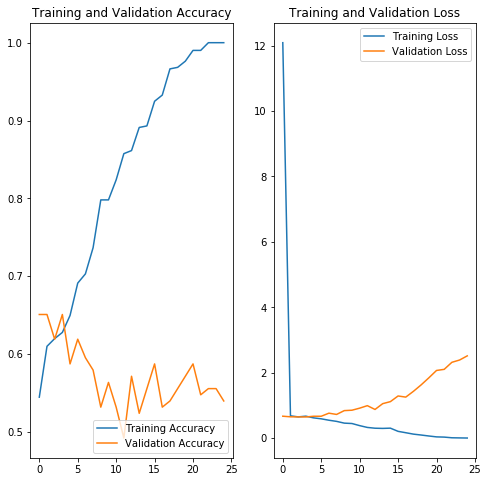

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
